In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cism_path = 'Data/cism.csv'
secfund_path = 'Data/secfund.csv'
results_path = 'Data/results.csv'

In [105]:
cism = pd.read_csv(cism_path)
secfund = pd.read_csv(secfund_path)
results = pd.read_csv(results_path)

for model in cism.columns[1:]:
    correct_cism = cism[model] == cism['A']
    score = correct_cism.sum()
    results.loc[results['Models'] == model, '# CISM'] = score
    results.loc[results['Models'] == model, 'CISM'] = score /len(cism) * 100

    correct_secfund = secfund[model] == secfund['A']
    score = correct_secfund.sum()
    results.loc[results['Models'] == model, '# SecFund'] = score
    results.loc[results['Models'] == model, 'SecFund'] = score /len(secfund) * 100

results['merged'] = (results['CISM'] + results['SecFund']) / 2
results['merged'] = results['merged']

print(results)
results.to_csv(results_path, index=False)

           Models  CISM  # CISM  SecFund  Params (B)  merged  # SecFund
0         Huntgpt    80       8       72          20    76.0        NaN
1   GPT 3.5 Turbo    50       5       72          20    61.0       18.0
2           GPT 4    90       9       84        1000    87.0       21.0
3  FalconLLM 108B    80       8       72         108    76.0       18.0
4  Claude 3 Sonet    90       9       76          70    83.0       19.0
5      Llama 2 7B    30       3       48           7    39.0       12.0
6     Llama 2 70B    50       5       60          70    55.0       15.0
7      Llama 3 8B    80       8       52           8    66.0       13.0
8     Llama 3 70B    80       8       72          70    76.0       18.0


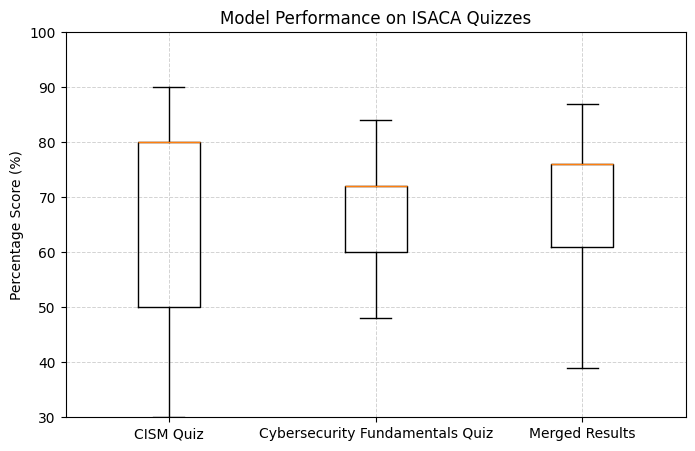

In [106]:
data = pd.read_csv(results_path)

boxplot_data = [data['CISM'], data['SecFund'], data['merged']]

fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

for i in range(1, len(boxplot_data) + 1):
    ax.axvline(x=i, color='lightgrey', linestyle='--', linewidth=0.7)

for y in range(40, 101, 10):
    ax.axhline(y=y, color='lightgrey', linestyle='--', linewidth=0.7)

ax.boxplot(boxplot_data, showmeans=False)  # Remove the mean triangle

ax.set_xticklabels(['CISM Quiz', 'Cybersecurity Fundamentals Quiz','Merged Results'])
ax.set_ylabel('Percentage Score (%)')
ax.set_title('Model Performance on ISACA Quizzes')

# Set Y-axis limits
ax.set_ylim([30, 100])

plt.show()

In [30]:
# Function to calculate the scores
def calculate_scores(table):
    models = table.columns[1:-1]
    scores = {}
    for model in models:
        correct_answers = table[model] == table['Answers']
        scores[model] = correct_answers.mean() * 100
    return scores

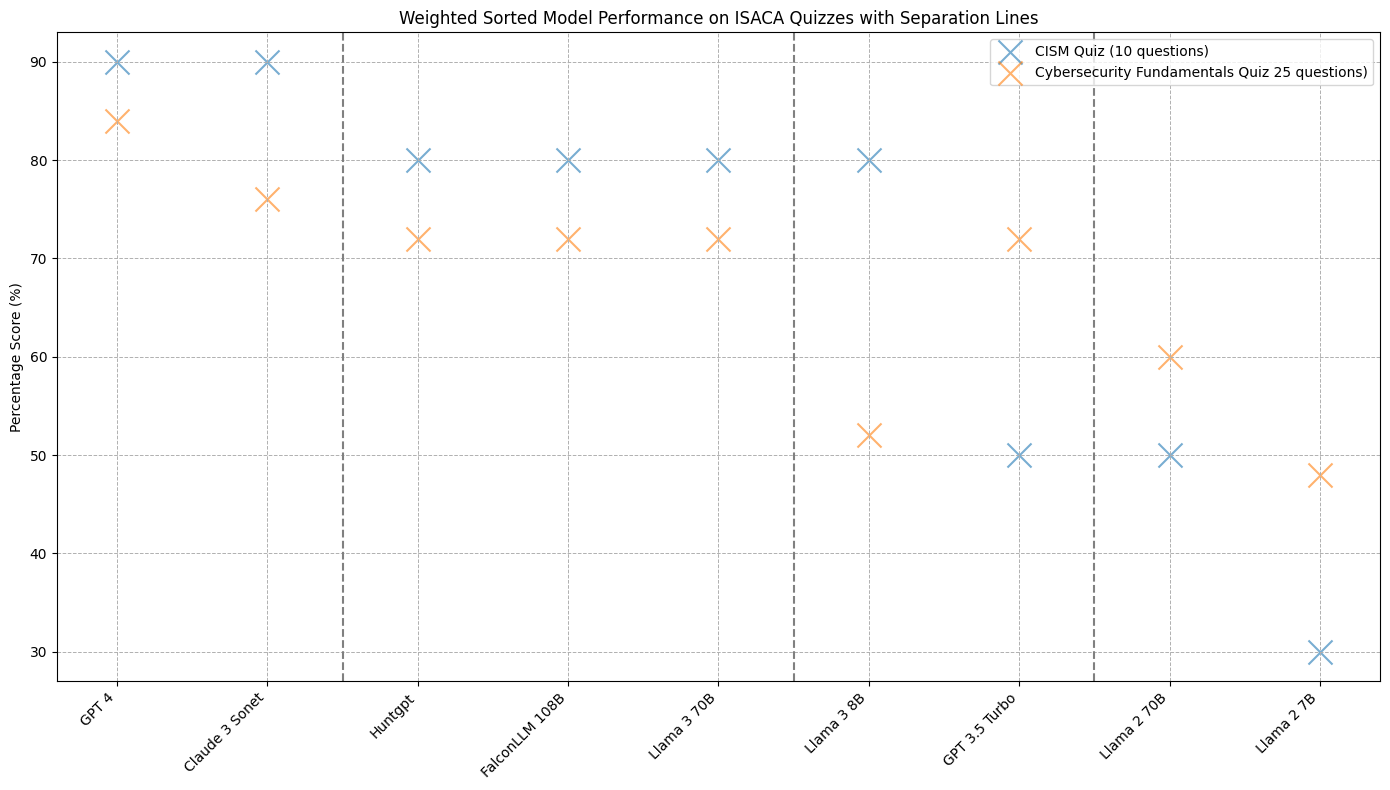

In [107]:
sorted_data = pd.read_csv(results_path).sort_values('merged', ascending=False)

plt.figure(figsize=(14, 8))
for quiz in ['CISM', 'SecFund']:
    plt.scatter(sorted_data['Models'], sorted_data[quiz], s=300, alpha=0.6, label=quiz, marker="x")

# separation lines
for index in [2,5, 7]:
    plt.axvline(x=index - 0.5, color='gray', linestyle='--')

plt.xticks(rotation=45, ha="right")
plt.ylabel('Percentage Score (%)')
plt.title('Weighted Sorted Model Performance on ISACA Quizzes with Separation Lines')
plt.legend(['CISM Quiz (10 questions)', 'Cybersecurity Fundamentals Quiz 25 questions)'])
plt.grid(linestyle='--', linewidth=0.7) 
plt.tight_layout()
plt.show()


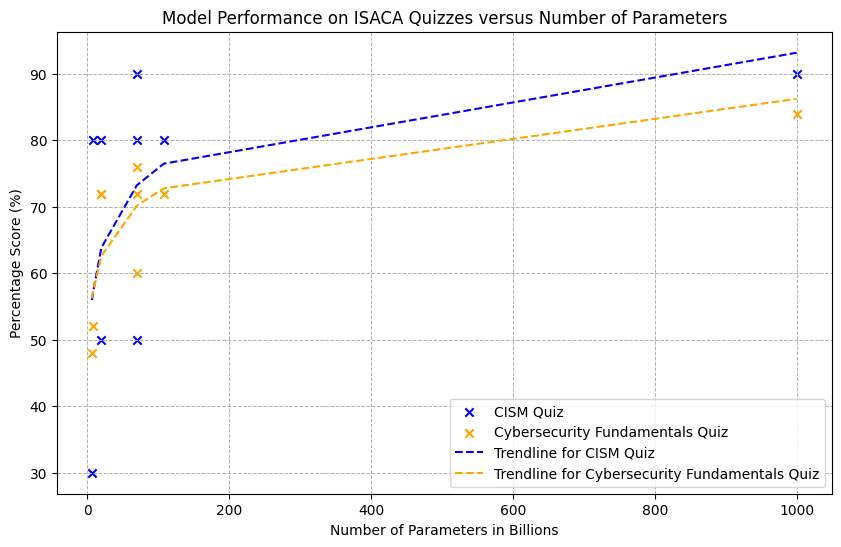

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv(results_path)
data = data.sort_values('Params (B)', ascending=True)
x_values = data['Params (B)']
y_values_cism = data['CISM']
y_values_secfunds = data['SecFund']
y_values_merged = data['merged']

# Log-transform the x values
log_x_values = np.log(x_values)

# Fit linear trends in the log space
curve_cism = np.polyfit(log_x_values, y_values_cism, 1)
curve_secfunds = np.polyfit(log_x_values, y_values_secfunds, 1)
#curve_merged = np.polyfit(log_x_values, y_values_merged, 1)

# Calculate the trendlines
y_fit_cism = np.polyval(curve_cism, log_x_values)
y_fit_secfunds = np.polyval(curve_secfunds, log_x_values)
#y_fit_merged = np.polyval(curve_merged, log_x_values)

# Plotting the original data
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values_cism, label="CISM Quiz", color='blue', marker='x')
plt.scatter(x_values, y_values_secfunds, label="Cybersecurity Fundamentals Quiz", color='orange', marker='x')
#plt.scatter(x_values, y_values_merged, label="Merged", color='Green', marker='x')

# Plotting the trendlines in the original scale
plt.plot(x_values, y_fit_cism, "b--", label="Trendline for CISM Quiz")
plt.plot(x_values, y_fit_secfunds, "--", label="Trendline for Cybersecurity Fundamentals Quiz", color='orange')
#plt.plot(x_values, y_fit_merged, "--", label="Trendline for Merged", color='green')

# Adding labels and title
plt.xlabel("Number of Parameters in Billions")
plt.ylabel("Percentage Score (%)")
plt.title("Model Performance on ISACA Quizzes versus Number of Parameters")

# Adding legend
plt.legend()

# Display the plot
plt.grid(linestyle='--', linewidth=0.7)
plt.show()

In [114]:
import statsmodels.api as sm

# Log-transforming the number of parameters
log_x_values = np.log(x_values)

# Adding a constant to the independent variable for the intercept in the model
X = sm.add_constant(log_x_values)

# Performing linear regression for CISM Quiz data
model_cism = sm.OLS(y_values_cism, X).fit()
p_value_cism = model_cism.pvalues[1]  # p-value for the slope

# Performing linear regression for Cybersecurity Fundamentals Quiz data
model_secfunds = sm.OLS(y_values_secfunds, X).fit()
p_value_secfunds = model_secfunds.pvalues[1]  # p-value for the slope

p_value_cism, p_value_secfunds

(0.13260665220447482, 0.011567441927694024)

In [115]:
(p_value_cism + p_value_secfunds) / 2

0.07208704706608442